# Simple Linear Regression On Salary Dataset

#### Objective :

<p> Implementing simple linear regression by predicting the salary of an employee give the years of experience they have. </p>

#### Secondary Objective :

<p> Determining the accuracy of the model by using R-Squared value </p>

<p> The salary dataset has 2 columns "Years Of Experience" and "Salary" for 35 employees in a company.</p>

In [1]:
# Import Statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

In [2]:
# Read the Data In csv Fomrat
salary_df = pd.read_csv("Salary.csv")
# First 5 Rows In the Dataset
salary_df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


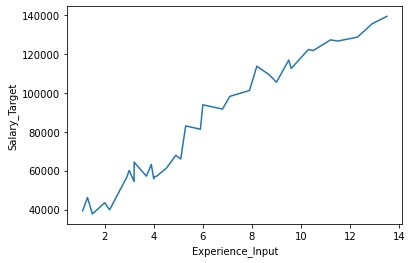

In [3]:
# Plotting Years Of Experience (Input) against Salary (Target)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(salary_df['YearsExperience'],salary_df['Salary'])
ax.set_xlabel('Experience_Input')
ax.set_ylabel('Salary_Target')
plt.show()

In [4]:
# Checking if any null values are null
salary_df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
# X is the Input Variable
X = salary_df[['YearsExperience']]
# Y is the Target Variable
y = salary_df[['Salary']]

In [6]:
# Splitting the Dataset into 70% Train and 30% Test Set
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [7]:
# Using LnearRegression from SKLearn
model=LinearRegression()

In [8]:
# Using Cross Validation Score
scores = cross_val_score(model, X_train, y_train, cv= 5)
print(scores)

[0.97600198 0.9482473  0.90674027 0.98476061 0.87229265]


In [9]:
# Fitting the Model on X and Y Train
model=model.fit(X_train, y_train)

In [10]:
# Predicting on the Test Set
y_pred=model.predict(X_test)

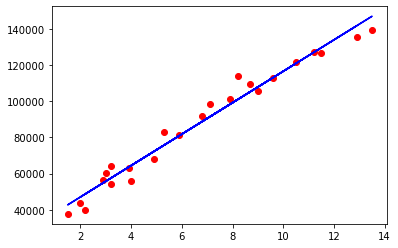

In [11]:
# Plotting the Train Set
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,model.predict(X_train),color='blue')

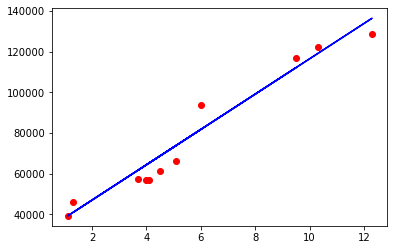

In [12]:
# Plotting the Test Set
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,model.predict(X_test),color='blue')

In [13]:
# Using the Model To Predict a Person With 12 Years of Experience
new_salary_pred = model.predict([[12]])
print('The predicted salary of a person with 12 years experience is ',new_salary_pred)

The predicted salary of a person with 12 years experience is  [[133868.08207584]]


In [14]:
y_bar = np.mean(y)
print(y_bar)

Salary    83945.6
dtype: float64


<p>
Now, we will see summary function where some other factors like standard error, t-statistcs and p-value are also displayed.
    
Here, we will use other variables xdata and ydata to store our features so that this model building would not be affected by the previous one. It uses OLS (Ordinary Least Square) method from statsmodel.api to build the model and display the summary. 
</p>

In [15]:
# Stat Models
xdata = salary_df['YearsExperience']
xdata = sm.add_constant(xdata)
ydata = salary_df['Salary']
model = sm.OLS(ydata, xdata).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     914.3
Date:                Thu, 21 Jan 2021   Prob (F-statistic):           1.23e-25
Time:                        20:55:47   Log-Likelihood:                -353.66
No. Observations:                  35   AIC:                             711.3
Df Residuals:                      33   BIC:                             714.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.886e+04   2092.797     13.790      0.000    2.46e+04    3.31e+04
YearsExperience  8731.9410    288.783     30.237      0.000    8144.407    9319.475
==============================================================================
Omnibus:                        1.704   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.426   Jarque-Bera (JB):                1.498
Skew:                           0.372   Prob(JB):                        0.473
Kurtosis:                       2.313   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""